## Introducción

Este notebook es el primero de una serie de Notebooks que acompañan el desarrollo del proyecto, el objetivo es seguir la linea de redacción de la memoria para demostrar la utilización de las distintas técnicas mencionadas en ella y aportár gráficos y valores.
Este Notebok en especial se centra en la representación gráfica de todos los puntos tratados en la primera parte de la memoria.



- Importación de librerías

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import os

# Librerías de audio
import librosa
import librosa.display

# Graficas
import matplotlib.pyplot as plt

# Reproducción Audio
from IPython.display import Audio

#
from scipy.stats import skew


# Capítulo 2. Metodología empleada

Para poder representar los diferentes ejemplos mencionados a lo largo de la memoria se utiliza un fragmento de los audios disponibles. Se ha seleccionado una fragmento de 10 segundos que contiene el canto de un pájaro, así como algunos otros sonidos del entorno.

## 2.1 Análisis de audio
En este apartado se carga un dataset ya preparado que servirá de apoyo para aplicar todas las técnicas de Análisis de Audio.
El dataset está en formato pickle, un formato de archivos que mantiene la información original de los datos y facilita el almacenamiento y la reutilización de información.


In [10]:
data_path="..\\data"
filename="dataset_fase1.pkl"
filepath=os.path.join(data_path,filename)

dataset=pd.read_pickle(filepath)
sr=24000

Para una correcta demostración se selecciona un fragmento de corta duración y se visualizan las diferentes técnicas de análisis de audio mencionadas.

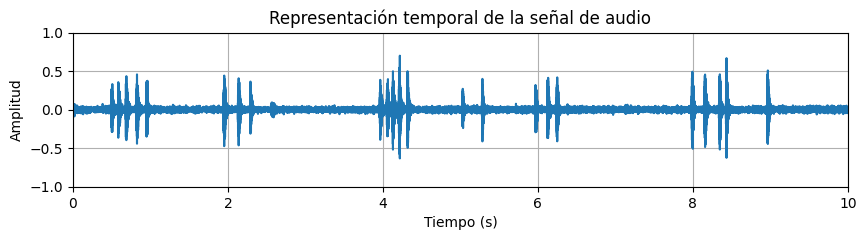

In [11]:
## Figura 3.
signal=np.concatenate(dataset["Signal"]) #Concatenar todas las muestras para una representación sencilla
y=signal[52*sr:62*sr] # Fragmento de 10 segundos

## Representación
# Calcular el tiempo transcurrido y crear un eje X correspondiente
t_seg = len(y) / sr
n = len(y)
x = np.linspace(0, t_seg, n)

fig, axis = plt.subplots(1, 1, figsize=(10, 2))
axis.plot(x, y)
axis.grid()
# Configurar los límites del gráfico
axis.set_xlim([0, t_seg])
axis.set_ylim([-1, 1])
# Título y etiquetas de los ejes
axis.set_title("Representación temporal de la señal de audio")
axis.set_xlabel("Tiempo (s)")
axis.set_ylabel("Amplitud")
# Mostrar el gráfico
plt.show()

In [12]:
# Reproducir el audio del fragmento seleccionado
Audio(data=y,rate=sr)

### 2.1.1 Transformada de Fourier

Representación de la señal en el eje frecuencia

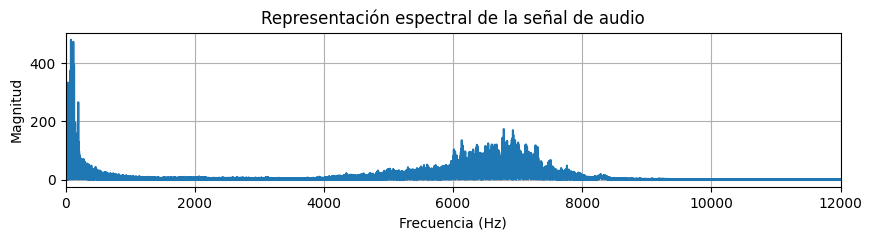

In [13]:
## Figura 4.
# Aplicar la Transformada de Fourier
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(Y), 1/sr)

# Solo tomar la mitad del espectro (parte positiva)
Y_magnitude = np.abs(Y[:len(Y)//2])
frequencies_positive = frequencies[:len(Y)//2]

# Graficar el espectro de frecuencias
plt.figure(figsize=(10,2))
plt.plot(frequencies_positive, Y_magnitude)
plt.title("Representación espectral de la señal de audio")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.xlim([0,12000])
plt.show()

### 2.1.2 Espectrograma

Representación del espectrograma de la señal en los eje tiempo-frecuencia

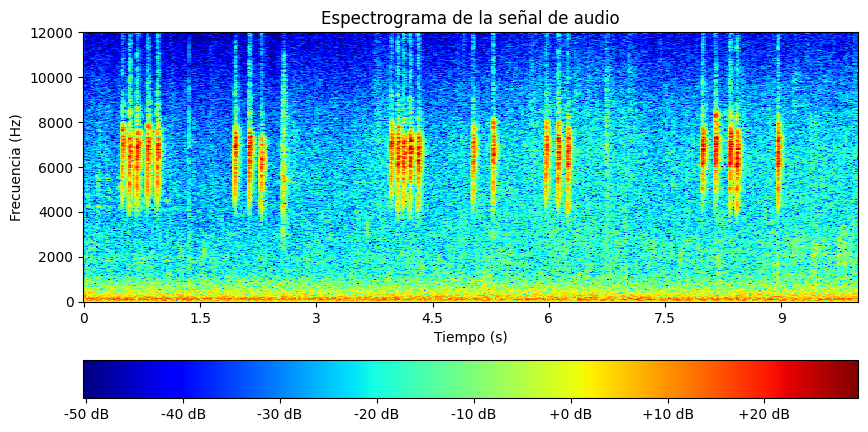

In [14]:
## Figura 5.
# Calcular el espectrograma
n_fft = 2048
hop_length = 512
S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
S_db = librosa.amplitude_to_db(np.abs(S))

# Graficar el espectrograma
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear",cmap="jet")
plt.colorbar(format="%+2.0f dB",orientation="horizontal")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.show()

### 2.1.3 Espectrograma Mel

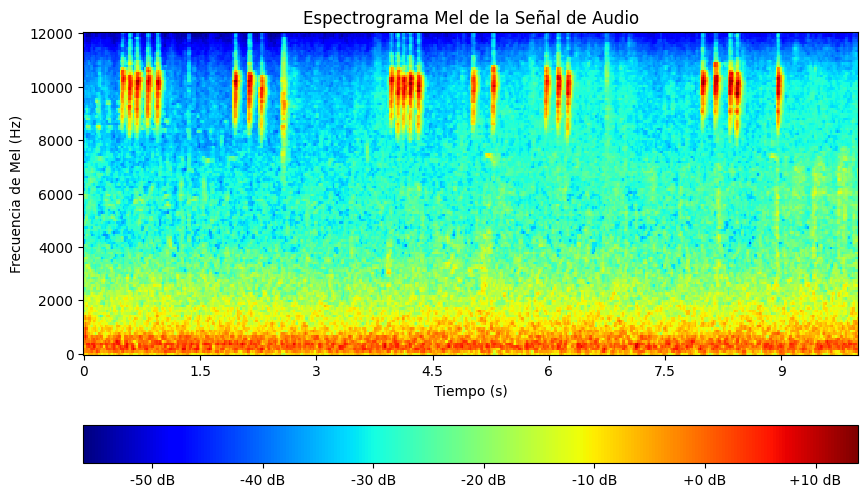

In [15]:
## Figura 9.

# Calcular el espectrograma de Mel

n_fft = 2048
hop_length = 512
S_Mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,hop_length=hop_length, n_mels=128)
S_Mel_dB = librosa.power_to_db(S_Mel)

# Graficar el espectrograma
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_Mel_dB, sr=sr, x_axis="time", y_axis="linear",cmap="jet")
plt.colorbar(format="%+2.0f dB",orientation="horizontal")
plt.title("Espectrograma Mel de la Señal de Audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia de Mel (Hz)")
plt.show()

## 2.2 Caracteristicas

En este apartado se realiza el cálculo y representación de las diferentes caracteristicas espectraler.

### 2.2.1 Flujo espectral

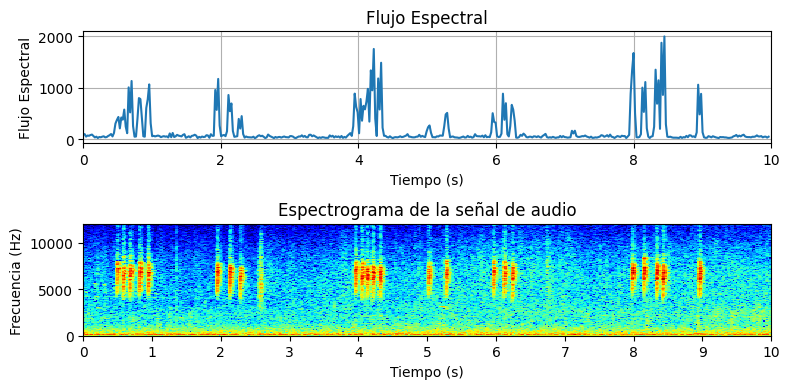

In [16]:
## Figura 10
## Spectral flux
flux = np.sqrt(np.sum(np.diff(np.abs(librosa.stft(y))**2, axis=1)**2, axis=0))

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(librosa.frames_to_time(np.arange(len(flux)),sr=sr), flux)
plt.title("Flujo Espectral")
plt.xlabel("Tiempo (s)")
plt.ylabel("Flujo Espectral")
plt.grid()
plt.xlim([0, 10])

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear",cmap="jet")

plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

### 2.2.2 Centroide espectral

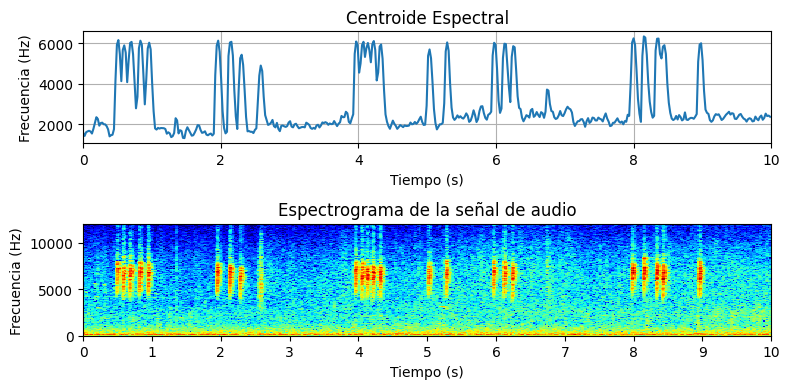

In [17]:
## Figura 11. (Se sustituye por la anterior)
## Spectral Centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.frames_to_time(np.arange(centroid.shape[1]), sr=sr)

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(times, centroid[0])
plt.title("Centroide Espectral")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.grid()

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear",cmap="jet")
# plt.colorbar(format="%+2.0f dB",orientation="horizontal")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

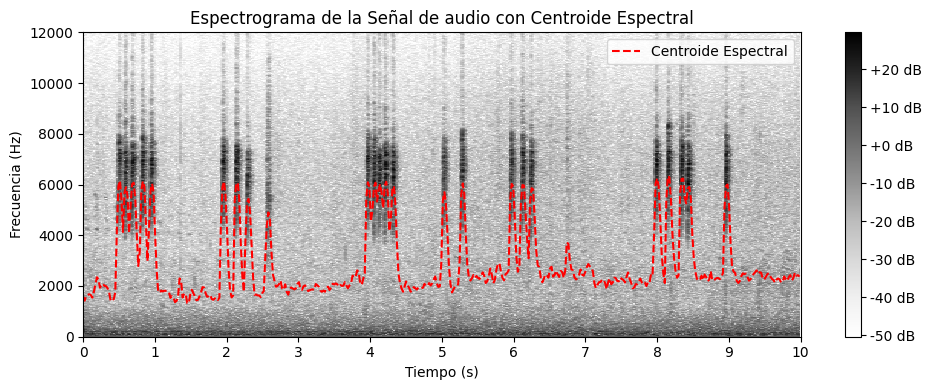

In [18]:
## Figura 11.
# Superposición y sistución de la gama de colores para una mejor visualización
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear", cmap="Greys")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma de la Señal de audio con Centroide Espectral")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])

# Superponer el centroide espectral
plt.plot(times, centroid[0], label="Centroide Espectral",color="red", linestyle="--")

plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### 2.2.3 Ancho de banda espectral

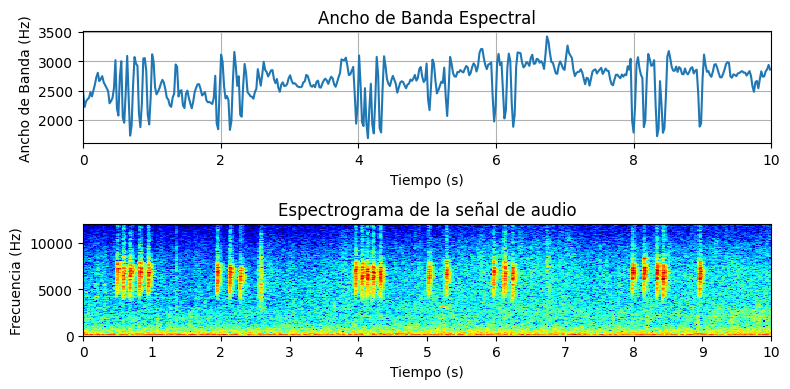

In [19]:
## Figura 12.
## Spectral bandwith
bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
times = librosa.frames_to_time(np.arange(bandwidth.shape[1]), sr=sr)

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(times, bandwidth[0])
plt.title("Ancho de Banda Espectral")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ancho de Banda (Hz)")
plt.xlim([0, 10])
plt.grid()

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear",cmap="jet")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

### 2.2.4 Planitud espectral

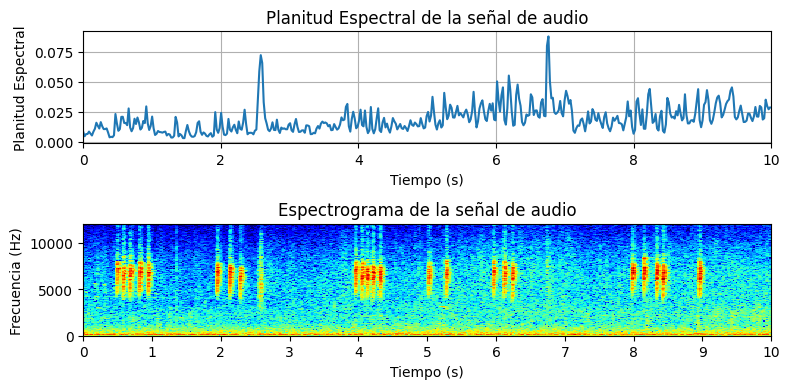

In [20]:
## Figura 13.
## Spectral flatness
spectral_flatness = librosa.feature.spectral_flatness(y=y)
# Convertir los tiempos a segundos
times = librosa.frames_to_time(np.arange(spectral_flatness.shape[1]), sr=sr)

# Visualizar la asimetría espectral y el espectrograma
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(times, spectral_flatness[0])
plt.ylabel("Planitud Espectral")
plt.xlabel("Tiempo (s)")
plt.title("Planitud Espectral de la señal de audio")
plt.grid()
plt.xlim([0, 10])

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear", cmap="jet")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

### 2.2.5 Asimetría espectral

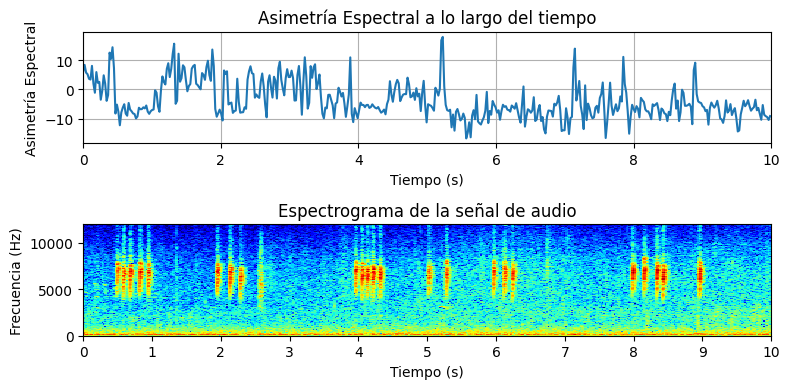

In [21]:
## Figura 14.
## Asimetría espectral

# Calcular el espectrograma de potencia
S = np.abs(librosa.stft(y))**2
# Calcular el centroide espectral y la dispersión espectral
centroid = librosa.feature.spectral_centroid(S=S, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=sr)
# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(S.shape[0], d=1/sr)
# Normalizar las frecuencias por su centroide y dispersión para cada frame
frequencies_normalized = (frequencies[:, np.newaxis] - centroid) / bandwidth

# Calcular la asimetría espectral utilizando scipy.stats.skew
spectral_skewness = skew(frequencies_normalized * S, axis=0, bias=False, nan_policy="omit")
# Convertir los tiempos a segundos
times = librosa.frames_to_time(np.arange(S.shape[1]), sr=sr)

# Visualizar la asimetría espectral y el espectrograma
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(times, spectral_skewness, label="Asimetría Espectral")
plt.xlabel("Tiempo (s)")
plt.ylabel("Asimetría Espectral")
plt.title("Asimetría Espectral a lo largo del tiempo")
plt.xlim([0, 10])
plt.grid()

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear", cmap="jet")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

### 2.2.6 Roll-off espectral

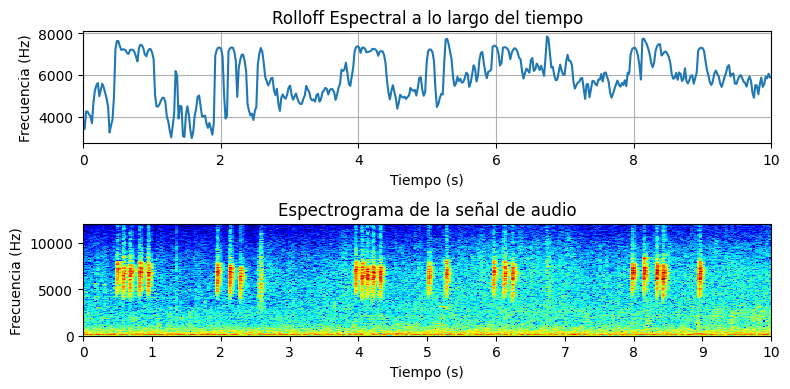

In [22]:
## Figura 15. (Se sustituye por la siguiente)
# Rolloff espectral con un umbral del 85%
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
times = librosa.frames_to_time(np.arange(rolloff.shape[1]), sr=sr)

# Visualizar el rolloff espectral y el espectrograma por separado
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(times, rolloff[0], label="Rolloff Espectral (85%)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Rolloff Espectral a lo largo del tiempo")
plt.xlim([0, 10])
plt.grid()

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear", cmap="jet")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

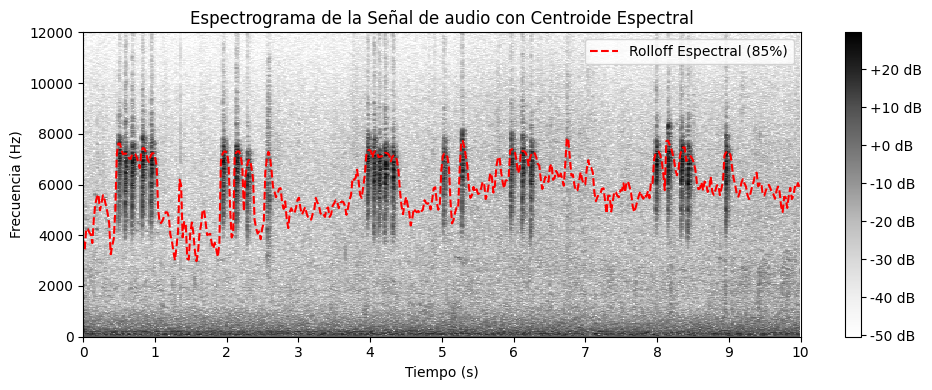

In [23]:
## Figura 15.
# Superposición y sistución de la gama de colores para una mejor visualización
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear", cmap="Greys")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma de la Señal de audio con Centroide Espectral")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])

# Superponer el rolloff espectral
plt.plot(times, rolloff[0], label="Rolloff Espectral (85%)",color="red", linestyle="--")

plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### 2.2.7 Contraste espectral

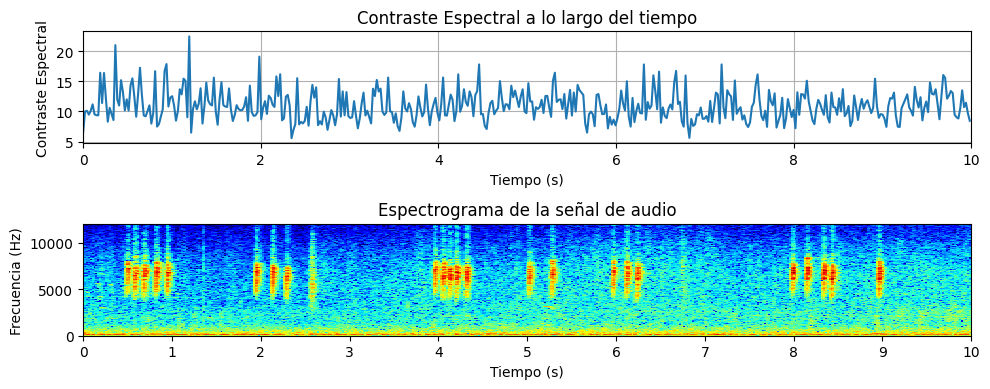

In [24]:
## Figura 16.
# Calcular el contraste espectral
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Convertir los tiempos a segundos
times = librosa.frames_to_time(np.arange(contrast.shape[1]), sr=sr)

# Visualizar el contraste espectral y el espectrograma
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(times, contrast[0], label="Contraste Espectral")
plt.xlabel("Tiempo (s)")
plt.ylabel("Contraste Espectral")
plt.title("Contraste Espectral a lo largo del tiempo")
plt.xlim([0, 10])
plt.grid()

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="linear", cmap="jet")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()


### 2.2.8 Coeficientes cepstrales de frecuencia Mel (MFCC)

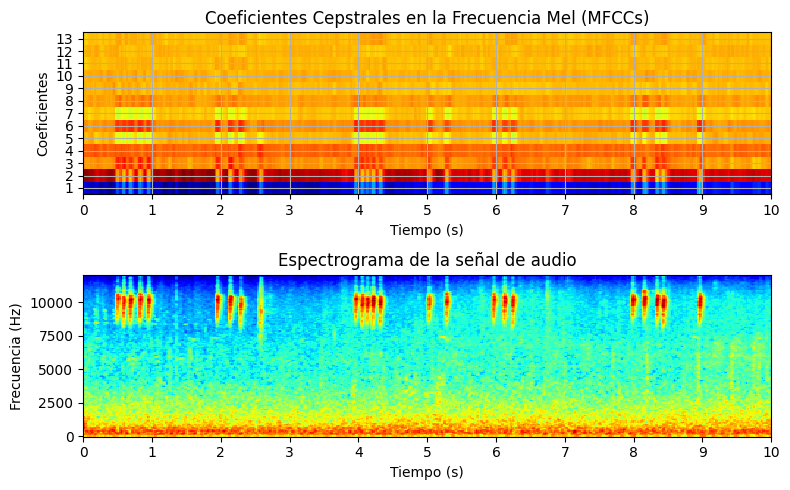

In [25]:
## Figura 18.
# Calcular los MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
# Convertir los tiempos a segundos
times = librosa.frames_to_time(np.arange(mfccs.shape[1]), sr=sr)

# Visualizar los MFCCs y el espectrograma mel
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
librosa.display.specshow(mfccs, x_axis="time", sr=sr, cmap="jet")
# plt.colorbar(label="Coeficientes Cepstrales")
plt.title("Coeficientes Cepstrales en la Frecuencia Mel (MFCCs)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Coeficientes")
plt.yticks(ticks=np.arange(mfccs.shape[0]), labels=np.arange(1, mfccs.shape[0] + 1))
plt.xlim([0, 10])
plt.grid()


plt.subplot(2, 1, 2)
librosa.display.specshow(S_Mel_dB, sr=sr, x_axis="time", y_axis="linear", cmap="jet")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

### 2.2.9 Delta MFCC

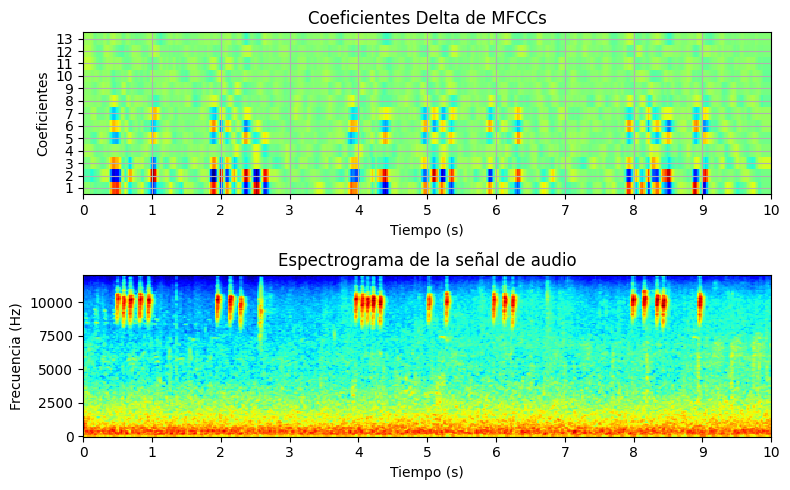

In [26]:
## Figura 19.
# Calcular los MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
delta_mfccs = librosa.feature.delta(mfccs)
times = librosa.frames_to_time(np.arange(delta_mfccs.shape[1]), sr=sr)

# Visualizar los coeficientes delta y el espectrograma
plt.figure(figsize=(8, 5))

plt.subplot(2, 1, 1)
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr, cmap="jet")
plt.title("Coeficientes Delta de MFCCs")
plt.yticks(ticks=np.arange(delta_mfccs.shape[0]), labels=np.arange(1, mfccs.shape[0] + 1))
plt.xlim([0, 10])
plt.xlabel("Tiempo (s)")
plt.ylabel("Coeficientes")
plt.grid()

plt.subplot(2, 1, 2)
librosa.display.specshow(S_Mel_dB, sr=sr, x_axis="time", y_axis="linear", cmap="jet")
plt.title("Espectrograma de la señal de audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.xlim([0, 10])
plt.tight_layout()
plt.show()

--------------